<a href="https://colab.research.google.com/github/RafaelCaballero/Julio25/blob/main/code/17otras_regresiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a la ciencia de datos con Python
### Rafa Caballero


## Otros métodos de regresión

Listamos todos los regresores disponibles

In [5]:
from sklearn.utils  import all_estimators
from sklearn import base
import warnings
warnings.filterwarnings("ignore")

estimators = all_estimators()

for name, class_ in estimators:
    if issubclass(class_, base.RegressorMixin):
        print(name)

ARDRegression
AdaBoostRegressor
BaggingRegressor
BayesianRidge
CCA
DecisionTreeRegressor
DummyRegressor
ElasticNet
ElasticNetCV
ExtraTreeRegressor
ExtraTreesRegressor
GammaRegressor
GaussianProcessRegressor
GradientBoostingRegressor
HistGradientBoostingRegressor
HuberRegressor
IsotonicRegression
KNeighborsRegressor
KernelRidge
Lars
LarsCV
Lasso
LassoCV
LassoLars
LassoLarsCV
LassoLarsIC
LinearRegression
LinearSVR
MLPRegressor
MultiOutputRegressor
MultiTaskElasticNet
MultiTaskElasticNetCV
MultiTaskLasso
MultiTaskLassoCV
NuSVR
OrthogonalMatchingPursuit
OrthogonalMatchingPursuitCV
PLSCanonical
PLSRegression
PassiveAggressiveRegressor
PoissonRegressor
QuantileRegressor
RANSACRegressor
RadiusNeighborsRegressor
RandomForestRegressor
RegressorChain
Ridge
RidgeCV
SGDRegressor
SVR
StackingRegressor
TheilSenRegressor
TransformedTargetRegressor
TweedieRegressor
VotingRegressor


Lista de todas las métricas

In [6]:
from sklearn.metrics import get_scorer_names
get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'd2_absolute_error_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_max_error',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'neg_root_mean_squared_log_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 're

Vamos a probar algunos de estos regresores, sin ajustar hiperparámetros

- [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html): la regresión lineal pura, ya vista<br>

- [GradientBoostingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html): método iterativo muy configurable, que va mirando hacía donde desciende una función de loss.

- [AdaBoostRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html): utiliza un regresor, mide el error cometido y lo va adaptando para mejorar

- [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html): Método basado en los árboles de decisión

- [RadomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html): Utiliza múltiples árboles de decisión para decidir qué punto ajusta mejor. Muy potente pero bastante lento.

- [SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html) : Epsilon-Support Vector Regression. Basado en support Vector Machines. Un método que no debe usarse para demasiados datos (>10000) puede ser muy lento<br>



In [9]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, r2_score,mean_squared_error,mean_absolute_error
import math

def evalua(regresor,X,y,x_train, y_train,x_test,y_test,label="grafico"):
        mod = regresor.fit(x_train,y_train)
        y_pred = mod.predict(x_test) # predicciones test

        test = x_test.copy()
        test['y'] = np.array(y_pred)
        test= pd.DataFrame.sort_index(test)


        ##############################
        # errores
        y_true = y_test
        rmse =  mean_squared_error(y_true,y_pred)
        mae = mean_absolute_error(y_true,y_pred)
        fig, ax = plt.subplots(figsize=(10, 4),dpi=100)

        ax.scatter(x=X,y=y,color="green",s=5)
        titulo = label+". MAE: %0.2f "%mae+" RMSE %0.2f"%rmse
        ax.scatter(x=test['x'],y=test['y'], color='red',s=4,label=label)
        plt.title(titulo)
        plt.show()
        return titulo
def muestra(X,y):
    metodos = [("LinearRegression",LinearRegression()),
               ("GradientBoostingRegressor",GradientBoostingRegressor()),
               ("AdaBoostRegressor",AdaBoostRegressor()),
               ("RandomForestRegressor",RandomForestRegressor()),
               ("DecisionTreeRegressor",DecisionTreeRegressor()),
               ("SVR",SVR())

              ]

    test = 0.4
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= test)
    report = ""
    for i,(nombre,metodo) in enumerate(metodos):
        t = evalua(metodo,X,y,X_train, y_train,X_test,y_test,nombre)
        report += "\n"+t

    print(report)


1.- Regresión lineal "perturbada"

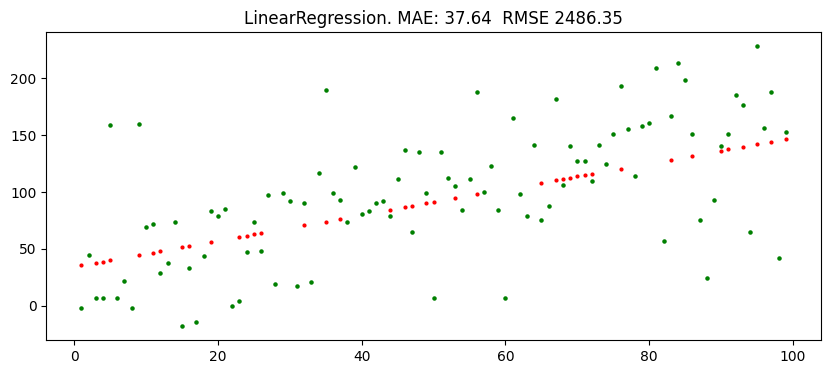

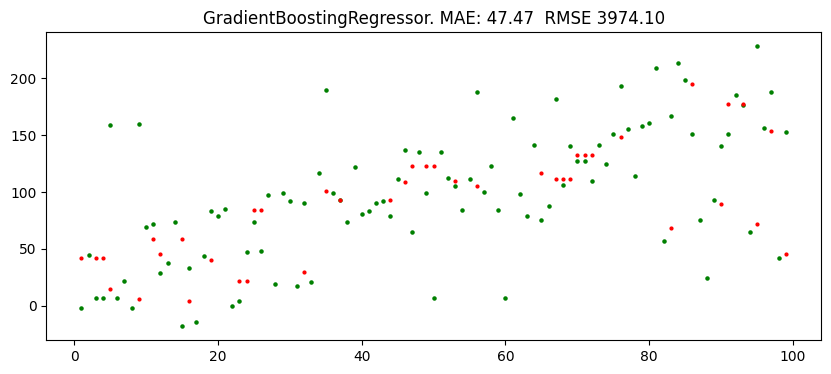

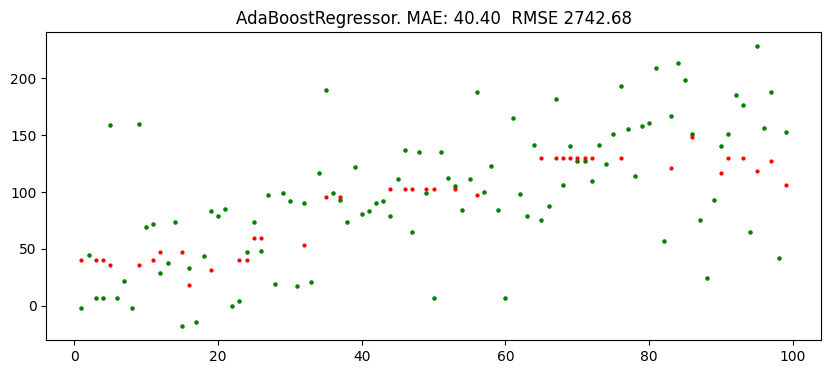

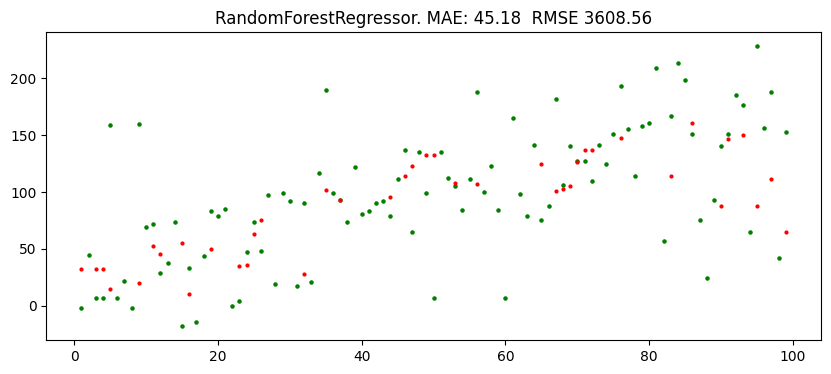

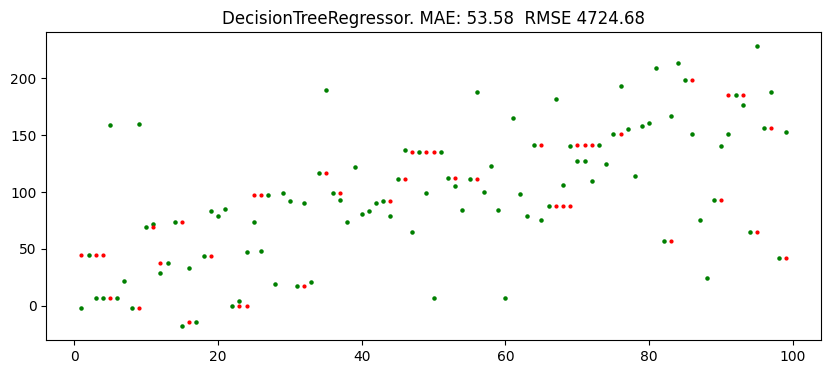

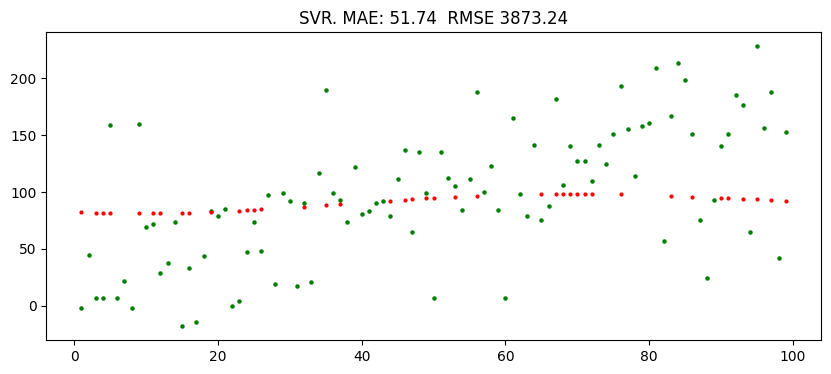


LinearRegression. MAE: 37.64  RMSE 2486.35
GradientBoostingRegressor. MAE: 47.47  RMSE 3974.10
AdaBoostRegressor. MAE: 40.40  RMSE 2742.68
RandomForestRegressor. MAE: 45.18  RMSE 3608.56
DecisionTreeRegressor. MAE: 53.58  RMSE 4724.68
SVR. MAE: 51.74  RMSE 3873.24


In [10]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

# genera datos aleatorios alrededor del eje x=y
# perturbacion: numero de cambios (sobre 100)
# grado: incremento de la perturbacion,
# locos: % de valores sin relación con los datos originales
def genera_datos(perturbacion=0,rango=0,n=1000,loco=4):
    data =  np.array([ [i,2*i+1,0] for i in range(n)])

    dataset = pd.DataFrame(data=data[1:,:],    # values
                  # 1st column as index
                  columns=data[0,:])
    df=dataset.astype(float)
    df.columns = ['x','y','perturbada']
    df['perturbada'] = df['y']
    max = np.max(df['y'])
    min = np.min(df['y'])
    # ahora perturbamos a la perturbada
    for i in range(len(df.index)):
        valorloco = random.randrange(100)<=loco
        if valorloco:
            df.iloc[i,2] = random.randrange(min,max)
        else:
            valor = random.randrange(100)

            hayquepertubar =  valor<=perturbacion
            #print(valor,perturbacion,hayquepertubar)
            if hayquepertubar:
                cuanto = random.randrange(rango)
                if random.randrange(2)==0:
                     cuanto *= -1
                df.iloc[i,2] =  df.iloc[i,1]+cuanto

    return df

df = genera_datos(perturbacion=85,rango=50,n=100, loco=15)


# tamaño del testo: 0.2
X = df['x'].to_frame()
y = df['perturbada'].to_frame()

muestra(X,y)

2.- "Látigo"

In [ ]:
import math
import numpy as np

n = 20
data =  np.array([ [i,math.sin(i)*i] for i in np.arange(0,n,0.1)])

dataset = pd.DataFrame(data=data,    # values
                  # 1st column as index
                  columns=['x','y'])
df=dataset.astype(float)
X = df['x'].to_frame()
y = df['y'].to_frame()


muestra(X,y)

3.- Función salto

In [ ]:
n = 200
data1 =  [ [i,10] for i in range(n)]
data2 =  [ [i,100] for i in range(n,n*2)]


dataset = pd.DataFrame(data=data1+data2,    # values
                  # 1st column as index
                  columns=data[0,:])
df=dataset.astype(float)
df.columns = ['x','y']
X = df['x'].to_frame()
y = df['y'].to_frame()


muestra(X,y)

4.- Semicírculo

In [ ]:
n = 20
data1 =  [ [x,y] for x in np.arange(10,n,0.1) for y in np.arange(10,n,0.1) if (x*x+y*y)<n*n and (x*x+y*y)>n*(n-1)]



dataset = pd.DataFrame(data=data1,    # values
                  # 1st column as index
                  columns=data[0,:])
df=dataset.astype(float)
df.columns = ['x','y']
X = df['x'].to_frame()
y = df['y'].to_frame()


muestra(X,y)